In [11]:
# import scipy to read .mat file
from scipy.io import loadmat

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# fmin_cg
from scipy.optimize import fmin_cg

%matplotlib inline

In [396]:
loc = 'C:\Program Files\Python36\Scripts\Coursera_ML\ex3\ex3data1.mat'
mat = loadmat(loc)

In [397]:
data_x = pd.DataFrame(mat['X'])
data_y = pd.DataFrame(mat['y'])
data = pd.concat([data_x, data_y], axis = 1)
data.shape

(5000, 401)

In [398]:
data_x.iloc[4999, :]

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
6      0.000000
7      0.000000
8      0.000000
9      0.000000
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14     0.000000
15     0.000000
16     0.000000
17     0.000000
18     0.000000
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     0.000000
24     0.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     0.000000
         ...   
370    0.000533
371    0.000000
372    0.000000
373    0.000000
374    0.000000
375    0.000000
376    0.000000
377    0.000000
378    0.000000
379    0.000000
380    0.000000
381    0.000000
382    0.000000
383    0.000000
384    0.000000
385    0.000000
386    0.000000
387    0.000000
388    0.000000
389    0.000000
390    0.000000
391    0.000000
392    0.000000
393    0.000000
394    0.000000
395    0.000000
396    0.000000
397    0.000000
398    0.000000
399    0.000000
Name: 4999, Length: 400,

In [4]:
def dispData(data, row, col):
    mat = np.array(data).reshape((row, col)).T
    imgplt = plt.imshow(mat, cmap='gray')
    return imgplt

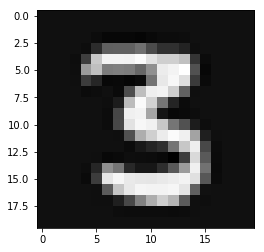

In [5]:
dispData(data_x.iloc[1980, :], 20, 20)

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

sigmd = np.vectorize(sigmoid)

In [434]:
aaa = testx.iloc[4999, :]



0           NaN
0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
6      0.000000
7      0.000000
8      0.000000
9      0.000000
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14     0.000000
15     0.000000
16     0.000000
17     0.000000
18     0.000000
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     0.000000
24     0.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
         ...   
370    0.000533
371    0.000000
372    0.000000
373    0.000000
374    0.000000
375    0.000000
376    0.000000
377    0.000000
378    0.000000
379    0.000000
380    0.000000
381    0.000000
382    0.000000
383    0.000000
384    0.000000
385    0.000000
386    0.000000
387    0.000000
388    0.000000
389    0.000000
390    0.000000
391    0.000000
392    0.000000
393    0.000000
394    0.000000
395    0.000000
396    0.000000
397    0.000000
398    0.000000
399    0.000000
Name: 4999, Length: 401,

In [510]:
# vectorized cost function
def costFunc_reg(theta, x, y, l):
    m = len(y)
    theta = np.array(theta)
    y = np.array(y)
    hx = sigmd(x.dot(theta))
    #print (np.isnan(hx).astype(int))
    
    if (hx.all() != 0) and ((1 - hx).all() != 0):
        theta_2 = [ theta[i] ** 2 for i in range(len(theta)) ]
        
        j = (- y.T * np.log(hx) - (1. - y.T) * np.log(1 - hx)).sum() / m + l * sum(theta_2) / 2. / m
    
    
    else: j = 100000
    
    #j = np.array(j)
    
    return j

In [511]:
def grad_reg(theta, x, y, l):
    m = len(y)
    theta = np.array(theta)
    y = np.array(y)
    hx = sigmd(np.dot(x, theta))
    
    loss = hx - y.T
    grad = np.dot(loss, x) / m 
    reg = [elem * l * 1. / m for elem in theta]
    grad += reg

    grad[0] = ((hx[0] - y[0]) * x.iloc[0, :]).sum() / m
    
    return grad.flatten()

In [508]:
# test scipy.optimize.fmin_cg
l = 1
x0 = [1] * data_x.shape[0]
df0 = pd.DataFrame(x0)
testx = pd.concat([df0, data_x], axis = 1)
testx
testy = (data_y == 1).astype(int)
theta0 = [0] * testx.shape[1]
myarg = (testx, testy, l)


#cf = costFunc_reg(theta0, testx, testy, l)
#cf
#grad = grad_reg(theta0, testx, testy, l)
#np.shape(grad)

#theta_test = fmin_cg(costFunc_reg, theta0, args = myarg, fprime = grad_reg)
#theta_test

In [512]:
theta_test = fmin_cg(costFunc_reg, theta0, args = myarg, fprime = grad_reg, disp = 1, retall = 1)
#theta_test

         Current function value: 0.246868
         Iterations: 2
         Function evaluations: 107
         Gradient evaluations: 95


In [441]:
# one-vs-all classification
def oneVsAll(x, y, num_labels, l):
    
    # add x0=1 to x
    x0 = pd.DataFrame([1] * x.shape[0])
    x = pd.concat([x0, x], axis = 1)
    
    # apply one-vs-all algorithm
    m, n = x.shape
    theta0 = np.zeros(shape = (1, n))
    theta = np.zeros(shape = (num_labels, n))
    for k in range(num_labels):
        label = (y == k).astype(int)
        train = fmin_cg(costFunc_reg, theta0, args = (x, y, l), fprime = grad_reg, full_output = 1)
        theta[k] = train[0]
    return theta

In [ ]:
theta_opt = oneVsAll(data_x, data_y, 10, 1)
theta_opt.shape

         Current function value: -176.752531
         Iterations: 0
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: -176.752531
         Iterations: 0
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: -176.752531
         Iterations: 0
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: -176.752531
         Iterations: 0
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: -176.752531
         Iterations: 0
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: -176.752531
         Iterations: 0
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: -176.752531
         Iterations: 0
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: -176.752

In [288]:
theta_opt

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])